In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
NUMER_OF_COLUMNS = 68
INFO_COLUMNS = ["GID", "MetricsCount", "CpuCount"]
GENERAL_COLUMNS = ["Total_runtime", "Runtime_RDTSC", "Runtime_unhalted", "Clock"]
CPI_COLUMN = "CPI"
BRANCH_COLUMNS = ["Branch_rate", "Branch_misprediction_rate", "Branch_misprediction_ratio", "Instructions_per_branch"]
CYCLE_COLUMNS = ["Cycles_without_execution", "Cycles_without_execution_L1D", "Cycles_without_execution_L2", "Cycles_without_execution_memory_loads"]


In [4]:
def generate_all_column_names(orginal_column_names):
    column_names = list()
    column_names.extend(INFO_COLUMNS)

    for column_name in GENERAL_COLUMNS:
        for thread_number in range(8):
            column_names.append(f"Thread_{thread_number}_{column_name}")

    column_names.append(CPI_COLUMN)

    for column_name in orginal_column_names:
        for thread_number in range(8):
            column_names.append(f"Thread_{thread_number}_{column_name}")
    
    return column_names

In [5]:
def generate_column_names(orginal_column_name):
    column_names = list()
    for thread_number in range(8):
        column_names.append(f"Thread_{thread_number}_{orginal_column_name}")

    return column_names

## Load the low / high / ransomware compute data

### Load low compute data

In [56]:
dataset_low = pd.read_csv("data/low_compute.csv", header=None, names=range(NUMER_OF_COLUMNS))
dataset_low.head(11)

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,1,8,8,0.024988,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,...,0.0,0.084466834592779,2.1522196593783,1.8054078545823,14.686604425578,4.2097324368555,0.70989395855628,5.7837314396385,4.6375,0.19710327455919
1,2,9,8,0.051025,0.010771,0.010771,0.010771,0.010771,0.010771,0.010771,...,0.0,0.0,0.0068359375,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,8,8,0.077977,0.011552,0.011552,0.011552,0.011552,0.011552,0.011552,...,-,0.0,0.0,0.0,-,0.0,0.0,-,-,0.0
3,4,5,8,0.104502,0.010668,0.010668,0.010668,0.010668,0.010668,0.010668,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,9,8,0.131131,0.009809,0.009809,0.009809,0.009809,0.009809,0.009809,...,-,-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,7,8,0.157614,0.009622,0.009622,0.009622,0.009622,0.009622,0.009622,...,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,7,8,0.184464,0.009372,0.009372,0.009372,0.009372,0.009372,0.009372,...,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,7,8,0.211299,0.009906,0.009906,0.009906,0.009906,0.009906,0.009906,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,7,8,0.238918,0.009192,0.009192,0.009192,0.009192,0.009192,0.009192,...,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,7,8,0.266472,0.008805,0.008805,0.008805,0.008805,0.008805,0.008805,...,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
dataset_low.shape

(43116, 68)

### Load high compute data

In [7]:
dataset_high = pd.read_csv("data/high_compute.csv", header=None, names=range(NUMER_OF_COLUMNS))
dataset_high.head(11)

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,1,8,8,0.024998,0.025010,0.025010,0.025010,0.025010,0.025010,0.025010,...,0.0019256134371544,0.018331754610798,164.34419014085,17.893581199636,19.588351940028,22.580842764608,3.1860300644187,27.648528610547,33.304720801487,1523.6695269404
1,2,9,8,0.064041,0.000064,0.000064,0.000064,0.000064,0.000064,0.000064,...,0.0,0.0,0.00067138671875,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,8,8,0.093710,0.000084,0.000084,0.000084,0.000084,0.000084,0.000084,...,-,-,-,-,-,-,-,-,-,-
3,4,5,8,0.125379,0.000063,0.000063,0.000063,0.000063,0.000063,0.000063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,9,8,0.156086,0.000066,0.000066,0.000066,0.000066,0.000066,0.000066,...,-,-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,7,8,0.186210,0.000063,0.000063,0.000063,0.000063,0.000063,0.000063,...,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,7,8,0.217417,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,...,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,7,8,0.248485,0.000139,0.000139,0.000139,0.000139,0.000139,0.000139,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,7,8,0.282069,0.000066,0.000066,0.000066,0.000066,0.000066,0.000066,...,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,7,8,0.315798,0.000065,0.000065,0.000065,0.000065,0.000065,0.000065,...,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
dataset_high.shape

(17876, 68)

### Load ransomware compute data

In [8]:
dataset_ransomware = pd.read_csv("data/wannacry_compute.csv", header=None, names=range(NUMER_OF_COLUMNS))
dataset_ransomware.head(11)

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,1,8,8,0.025028,0.025037,0.025037,0.025037,0.025037,0.025037,0.025037,...,0.068010517090272,0.068897051523876,17.393693435091,451.77866384572,17.795977346907,16.551447672809,8.8887081784387,3892.8162381882,4.3266725094946,15.144941923955
1,2,9,8,0.050859,0.002812,0.002812,0.002812,0.002812,0.002812,0.002812,...,0.0,0.0,0.002685546875,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,8,8,0.078174,0.000064,0.000064,0.000064,0.000064,0.000064,0.000064,...,-,-,-,-,-,-,-,-,-,-
3,4,5,8,0.104883,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,9,8,0.131380,0.007468,0.007468,0.007468,0.007468,0.007468,0.007468,...,-,-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,7,8,0.157632,0.008780,0.008780,0.008780,0.008780,0.008780,0.008780,...,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,7,8,0.184114,0.009012,0.009012,0.009012,0.009012,0.009012,0.009012,...,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,7,8,0.210598,0.009448,0.009448,0.009448,0.009448,0.009448,0.009448,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,7,8,0.240759,0.000065,0.000065,0.000065,0.000065,0.000065,0.000065,...,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,7,8,0.273110,0.000065,0.000065,0.000065,0.000065,0.000065,0.000065,...,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
dataset_ransomware.shape

(2233, 68)

In [9]:
dataset_low.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43116 entries, 0 to 43115
Data columns (total 68 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       43116 non-null  int64  
 1   1       43116 non-null  int64  
 2   2       43116 non-null  int64  
 3   3       43116 non-null  float64
 4   4       43116 non-null  float64
 5   5       43116 non-null  float64
 6   6       43116 non-null  float64
 7   7       43116 non-null  float64
 8   8       43116 non-null  float64
 9   9       43116 non-null  float64
 10  10      43116 non-null  float64
 11  11      43116 non-null  float64
 12  12      43116 non-null  float64
 13  13      43116 non-null  float64
 14  14      43116 non-null  float64
 15  15      43116 non-null  float64
 16  16      43116 non-null  float64
 17  17      43116 non-null  float64
 18  18      43116 non-null  float64
 19  19      43116 non-null  float64
 20  20      43116 non-null  object 
 21  21      43116 non-null  object 
 22

In [10]:
dataset_high.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17876 entries, 0 to 17875
Data columns (total 68 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       17876 non-null  int64  
 1   1       17876 non-null  int64  
 2   2       17876 non-null  int64  
 3   3       17876 non-null  float64
 4   4       17876 non-null  float64
 5   5       17876 non-null  float64
 6   6       17876 non-null  float64
 7   7       17876 non-null  float64
 8   8       17876 non-null  float64
 9   9       17876 non-null  float64
 10  10      17876 non-null  float64
 11  11      17876 non-null  float64
 12  12      17876 non-null  float64
 13  13      17876 non-null  float64
 14  14      17876 non-null  float64
 15  15      17876 non-null  float64
 16  16      17876 non-null  float64
 17  17      17876 non-null  float64
 18  18      17876 non-null  float64
 19  19      17876 non-null  float64
 20  20      17876 non-null  object 
 21  21      17876 non-null  object 
 22

In [11]:
dataset_ransomware.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 68 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2233 non-null   int64  
 1   1       2233 non-null   int64  
 2   2       2233 non-null   int64  
 3   3       2233 non-null   float64
 4   4       2233 non-null   float64
 5   5       2233 non-null   float64
 6   6       2233 non-null   float64
 7   7       2233 non-null   float64
 8   8       2233 non-null   float64
 9   9       2233 non-null   float64
 10  10      2233 non-null   float64
 11  11      2233 non-null   float64
 12  12      2233 non-null   float64
 13  13      2233 non-null   float64
 14  14      2233 non-null   float64
 15  15      2233 non-null   float64
 16  16      2233 non-null   float64
 17  17      2233 non-null   float64
 18  18      2233 non-null   float64
 19  19      2233 non-null   float64
 20  20      2233 non-null   object 
 21  21      2233 non-null   object 
 22  

### Preprocessing steps

In [12]:
dataset_preprocessing_low = dataset_low.fillna(0)
dataset_preprocessing_low = dataset_preprocessing_low.replace(to_replace="-", value=0)
dataset_preprocessing_low = dataset_preprocessing_low.replace(to_replace="inf", value=0)
dataset_preprocessing_low = dataset_preprocessing_low.apply(pd.to_numeric)

dataset_preprocessing_low.head(11)

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,1,8,8,0.024988,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,...,0.0,0.084467,2.152220,1.805408,14.686604,4.209732,0.709894,5.783731,4.6375,0.197103
1,2,9,8,0.051025,0.010771,0.010771,0.010771,0.010771,0.010771,0.010771,...,0.0,0.000000,0.006836,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
2,3,8,8,0.077977,0.011552,0.011552,0.011552,0.011552,0.011552,0.011552,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
3,4,5,8,0.104502,0.010668,0.010668,0.010668,0.010668,0.010668,0.010668,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
4,5,9,8,0.131131,0.009809,0.009809,0.009809,0.009809,0.009809,0.009809,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
5,6,7,8,0.157614,0.009622,0.009622,0.009622,0.009622,0.009622,0.009622,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
6,7,7,8,0.184464,0.009372,0.009372,0.009372,0.009372,0.009372,0.009372,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
7,8,7,8,0.211299,0.009906,0.009906,0.009906,0.009906,0.009906,0.009906,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
8,9,7,8,0.238918,0.009192,0.009192,0.009192,0.009192,0.009192,0.009192,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
9,10,7,8,0.266472,0.008805,0.008805,0.008805,0.008805,0.008805,0.008805,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000


In [13]:
dataset_preprocessing_high = dataset_high.fillna(0)
dataset_preprocessing_high = dataset_preprocessing_high.replace(to_replace="-", value=0)
dataset_preprocessing_high = dataset_preprocessing_high.replace(to_replace="inf", value=0)
dataset_preprocessing_high = dataset_preprocessing_high.apply(pd.to_numeric)

dataset_preprocessing_high.head(11)

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,1,8,8,0.024998,0.025010,0.025010,0.025010,0.025010,0.025010,0.025010,...,0.001926,0.018332,164.344190,17.893581,19.588352,22.580843,3.18603,27.648529,33.304721,1523.669527
1,2,9,8,0.064041,0.000064,0.000064,0.000064,0.000064,0.000064,0.000064,...,0.000000,0.000000,0.000671,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
2,3,8,8,0.093710,0.000084,0.000084,0.000084,0.000084,0.000084,0.000084,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
3,4,5,8,0.125379,0.000063,0.000063,0.000063,0.000063,0.000063,0.000063,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
4,5,9,8,0.156086,0.000066,0.000066,0.000066,0.000066,0.000066,0.000066,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
5,6,7,8,0.186210,0.000063,0.000063,0.000063,0.000063,0.000063,0.000063,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
6,7,7,8,0.217417,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
7,8,7,8,0.248485,0.000139,0.000139,0.000139,0.000139,0.000139,0.000139,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
8,9,7,8,0.282069,0.000066,0.000066,0.000066,0.000066,0.000066,0.000066,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
9,10,7,8,0.315798,0.000065,0.000065,0.000065,0.000065,0.000065,0.000065,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000


In [14]:
dataset_preprocessing_ransomware = dataset_ransomware.fillna(0)
dataset_preprocessing_ransomware = dataset_preprocessing_ransomware.replace(to_replace="-", value=0)
dataset_preprocessing_ransomware = dataset_preprocessing_ransomware.replace(to_replace="inf", value=0)
dataset_preprocessing_ransomware = dataset_preprocessing_ransomware.apply(pd.to_numeric)

dataset_preprocessing_ransomware.head(11)

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,1,8,8,0.025028,0.025037,0.025037,0.025037,0.025037,0.025037,0.025037,...,0.068011,0.068897,17.393693,451.778664,17.795977,16.551448,8.888708,3892.816238,4.326673,15.144942
1,2,9,8,0.050859,0.002812,0.002812,0.002812,0.002812,0.002812,0.002812,...,0.000000,0.000000,0.002686,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,3,8,8,0.078174,0.000064,0.000064,0.000064,0.000064,0.000064,0.000064,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,4,5,8,0.104883,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,5,9,8,0.131380,0.007468,0.007468,0.007468,0.007468,0.007468,0.007468,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,6,7,8,0.157632,0.008780,0.008780,0.008780,0.008780,0.008780,0.008780,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,7,7,8,0.184114,0.009012,0.009012,0.009012,0.009012,0.009012,0.009012,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,8,7,8,0.210598,0.009448,0.009448,0.009448,0.009448,0.009448,0.009448,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,9,7,8,0.240759,0.000065,0.000065,0.000065,0.000065,0.000065,0.000065,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,10,7,8,0.273110,0.000065,0.000065,0.000065,0.000065,0.000065,0.000065,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [15]:
dataset_preprocessing_low.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43116 entries, 0 to 43115
Data columns (total 68 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       43116 non-null  int64  
 1   1       43116 non-null  int64  
 2   2       43116 non-null  int64  
 3   3       43116 non-null  float64
 4   4       43116 non-null  float64
 5   5       43116 non-null  float64
 6   6       43116 non-null  float64
 7   7       43116 non-null  float64
 8   8       43116 non-null  float64
 9   9       43116 non-null  float64
 10  10      43116 non-null  float64
 11  11      43116 non-null  float64
 12  12      43116 non-null  float64
 13  13      43116 non-null  float64
 14  14      43116 non-null  float64
 15  15      43116 non-null  float64
 16  16      43116 non-null  float64
 17  17      43116 non-null  float64
 18  18      43116 non-null  float64
 19  19      43116 non-null  float64
 20  20      43116 non-null  float64
 21  21      43116 non-null  float64
 22

In [16]:
dataset_high.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17876 entries, 0 to 17875
Data columns (total 68 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       17876 non-null  int64  
 1   1       17876 non-null  int64  
 2   2       17876 non-null  int64  
 3   3       17876 non-null  float64
 4   4       17876 non-null  float64
 5   5       17876 non-null  float64
 6   6       17876 non-null  float64
 7   7       17876 non-null  float64
 8   8       17876 non-null  float64
 9   9       17876 non-null  float64
 10  10      17876 non-null  float64
 11  11      17876 non-null  float64
 12  12      17876 non-null  float64
 13  13      17876 non-null  float64
 14  14      17876 non-null  float64
 15  15      17876 non-null  float64
 16  16      17876 non-null  float64
 17  17      17876 non-null  float64
 18  18      17876 non-null  float64
 19  19      17876 non-null  float64
 20  20      17876 non-null  object 
 21  21      17876 non-null  object 
 22

In [17]:
dataset_preprocessing_ransomware.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 68 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2233 non-null   int64  
 1   1       2233 non-null   int64  
 2   2       2233 non-null   int64  
 3   3       2233 non-null   float64
 4   4       2233 non-null   float64
 5   5       2233 non-null   float64
 6   6       2233 non-null   float64
 7   7       2233 non-null   float64
 8   8       2233 non-null   float64
 9   9       2233 non-null   float64
 10  10      2233 non-null   float64
 11  11      2233 non-null   float64
 12  12      2233 non-null   float64
 13  13      2233 non-null   float64
 14  14      2233 non-null   float64
 15  15      2233 non-null   float64
 16  16      2233 non-null   float64
 17  17      2233 non-null   float64
 18  18      2233 non-null   float64
 19  19      2233 non-null   float64
 20  20      2233 non-null   float64
 21  21      2233 non-null   float64
 22  

## Get all BRANCH metric rows

In [65]:
branch_data_low = dataset_preprocessing_low[dataset_preprocessing_low[0] == 1]
branch_data_low.columns = generate_all_column_names(BRANCH_COLUMNS)

branch_data_low_copy = branch_data_low.copy(deep=True)
branch_data_low_copy["Branch_rate"] = branch_data_low[generate_column_names("Branch_rate")].max(axis=1)
branch_data_low_copy["Branch_misprediction_rate"] = branch_data_low[generate_column_names("Branch_misprediction_rate")].max(axis=1)
branch_data_low_copy["Branch_misprediction_ratio"] = branch_data_low[generate_column_names("Branch_misprediction_ratio")].max(axis=1)
branch_data_low_copy["Instructions_per_branch"] = branch_data_low[generate_column_names("Instructions_per_branch")].max(axis=1)

branch_summary_colums = ["Thread_0_Total_runtime"] + BRANCH_COLUMNS
branch_data_low_summary = branch_data_low_copy[branch_summary_colums]
branch_data_low_summary.head()

,Thread_0_Total_runtime,Branch_rate,Branch_misprediction_rate,Branch_misprediction_ratio,Instructions_per_branch
0,0.024988,5.073482,0.428541,0.08909,14.686604
11,0.321100,0.000000,0.000000,0.00000,0.000000
22,0.615206,0.000000,0.000000,0.00000,0.000000
33,0.911049,0.000000,0.000000,0.00000,0.000000
44,1.206740,0.000000,0.000000,0.00000,0.000000


In [66]:
branch_data_high = dataset_preprocessing_high[dataset_preprocessing_high[0] == 1]
branch_data_high.columns = generate_all_column_names(BRANCH_COLUMNS)

branch_data_high_copy = branch_data_high.copy(deep=True)
branch_data_high_copy["Branch_rate"] = branch_data_high[generate_column_names("Branch_rate")].max(axis=1)
branch_data_high_copy["Branch_misprediction_rate"] = branch_data_high[generate_column_names("Branch_misprediction_rate")].max(axis=1)
branch_data_high_copy["Branch_misprediction_ratio"] = branch_data_high[generate_column_names("Branch_misprediction_ratio")].max(axis=1)
branch_data_high_copy["Instructions_per_branch"] = branch_data_high[generate_column_names("Instructions_per_branch")].max(axis=1)

branch_summary_colums = ["Thread_0_Total_runtime"] + BRANCH_COLUMNS
branch_data_high_summary = branch_data_high_copy[branch_summary_colums]
branch_data_high_summary.head()

,Thread_0_Total_runtime,Branch_rate,Branch_misprediction_rate,Branch_misprediction_ratio,Instructions_per_branch
0,0.024998,0.31387,0.002688,0.131455,1523.669527
11,0.383201,0.00000,0.000000,0.000000,0.000000
22,0.768817,0.00000,0.000000,0.000000,0.000000
33,1.169078,0.00000,0.000000,0.000000,0.000000
44,1.561056,0.00000,0.000000,0.000000,0.000000


In [67]:
branch_data_ransomware = dataset_preprocessing_ransomware[dataset_preprocessing_ransomware[0] == 1]
branch_data_ransomware.columns = generate_all_column_names(BRANCH_COLUMNS)

branch_data_ransomware_copy = branch_data_ransomware.copy(deep=True)
branch_data_ransomware_copy["Branch_rate"] = branch_data_ransomware[generate_column_names("Branch_rate")].max(axis=1)
branch_data_ransomware_copy["Branch_misprediction_rate"] = branch_data_ransomware[generate_column_names("Branch_misprediction_rate")].max(axis=1)
branch_data_ransomware_copy["Branch_misprediction_ratio"] = branch_data_ransomware[generate_column_names("Branch_misprediction_ratio")].max(axis=1)
branch_data_ransomware_copy["Instructions_per_branch"] = branch_data_ransomware[generate_column_names("Instructions_per_branch")].max(axis=1)

branch_summary_colums = ["Thread_0_Total_runtime"] + BRANCH_COLUMNS
branch_data_ransomware_summary = branch_data_ransomware_copy[branch_summary_colums]
branch_data_ransomware_summary.head()

,Thread_0_Total_runtime,Branch_rate,Branch_misprediction_rate,Branch_misprediction_ratio,Instructions_per_branch
0,0.025028,0.231124,0.015719,0.068897,3892.816238
11,0.338723,0.000000,0.000000,0.000000,0.000000
22,0.705457,0.000000,0.000000,0.000000,0.000000
33,1.078375,0.000000,0.000000,0.000000,0.000000
44,1.441378,0.000000,0.000000,0.000000,0.000000


### Analyse BRANCH HPC

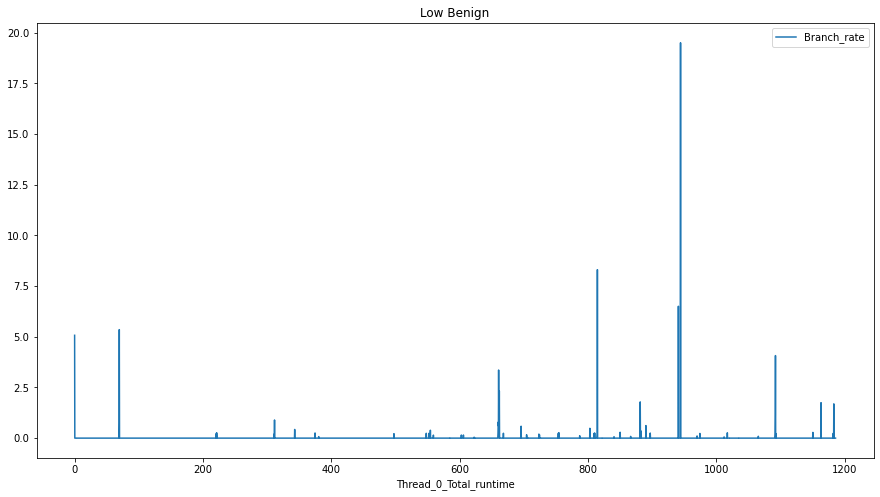

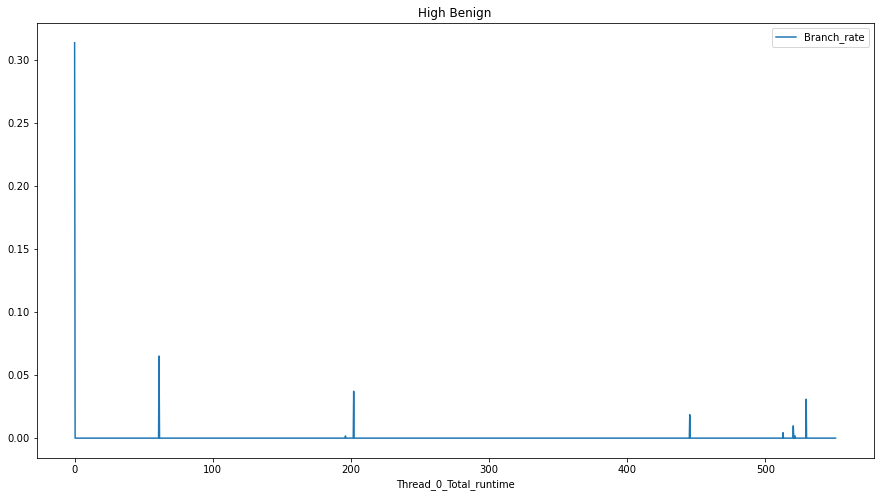

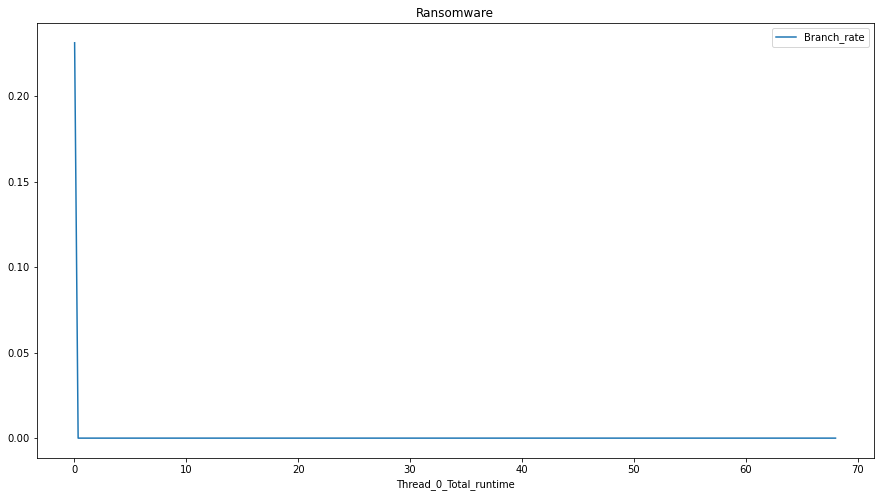

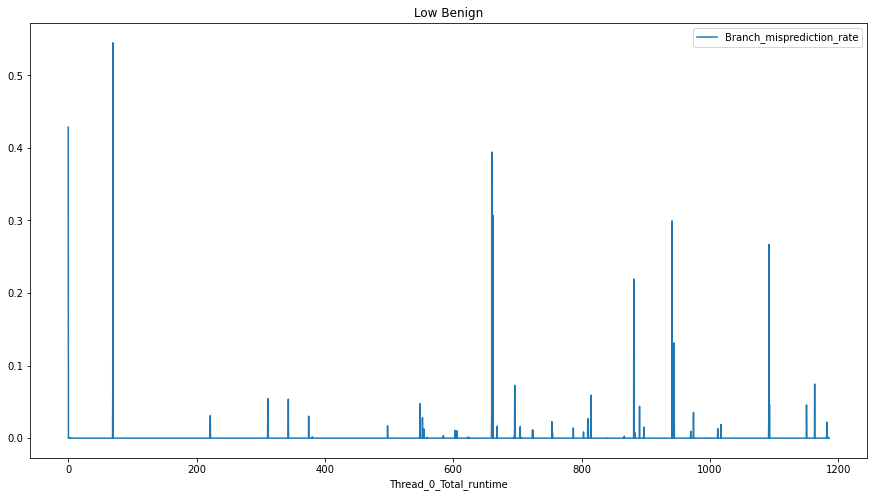

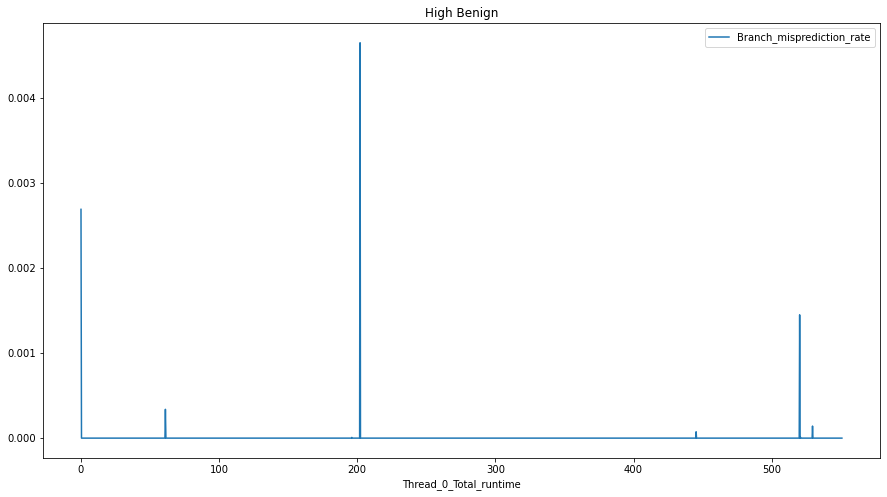

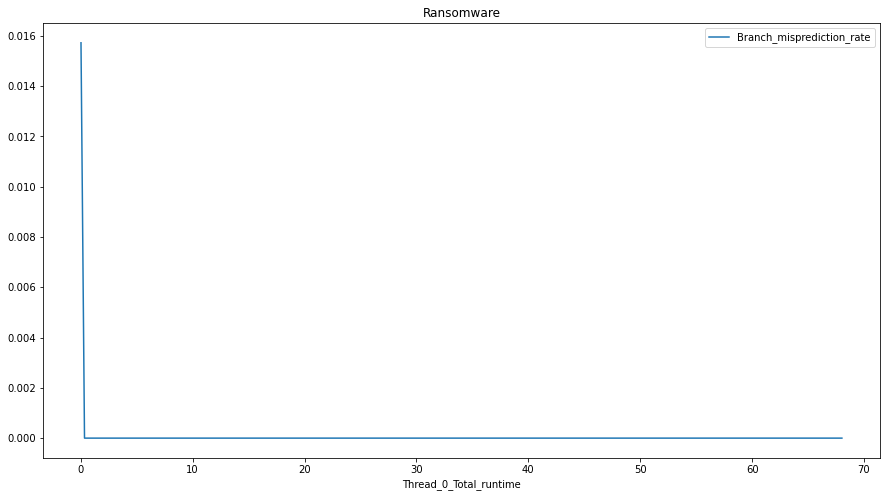

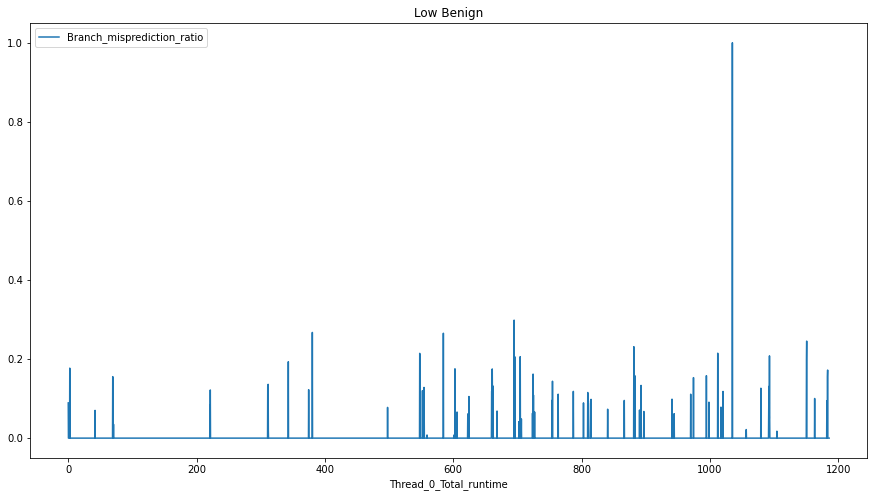

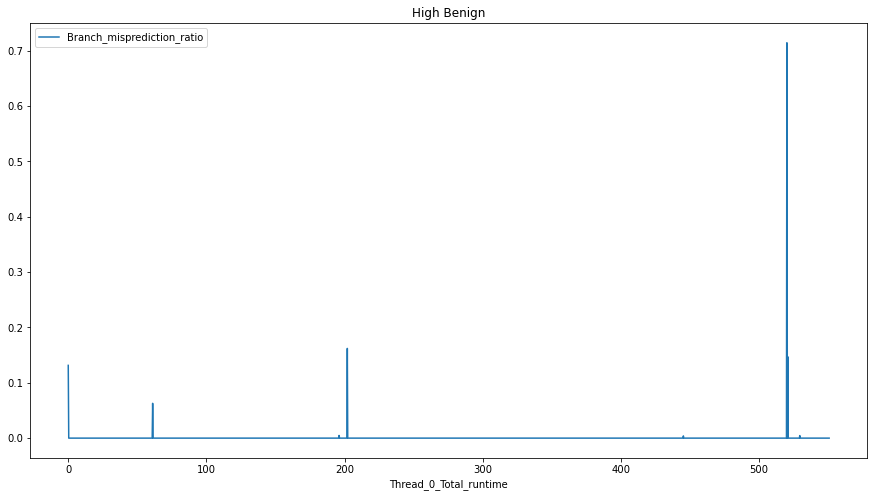

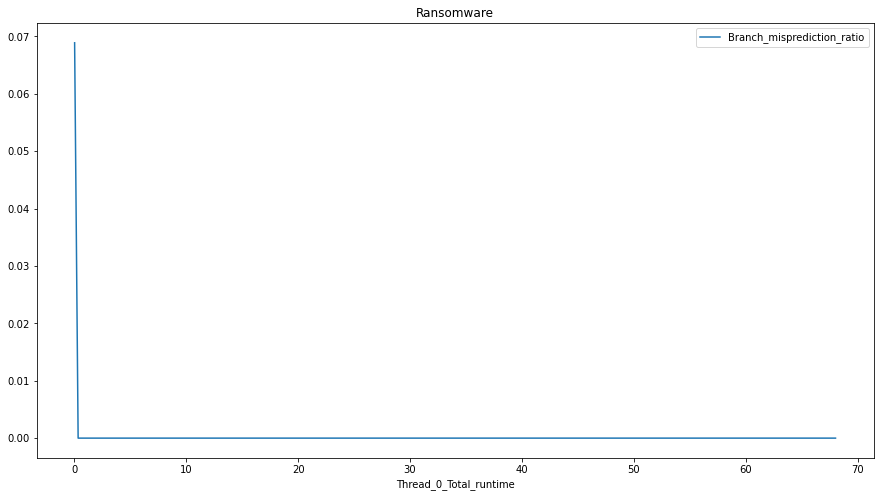

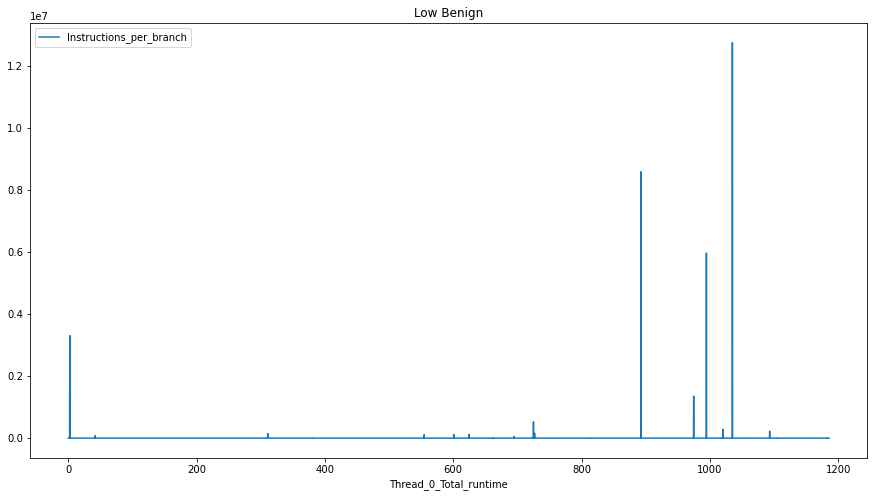

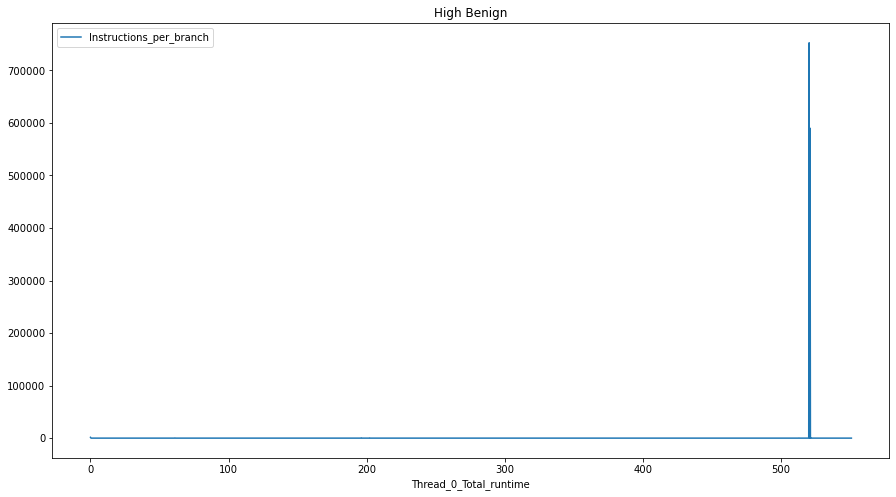

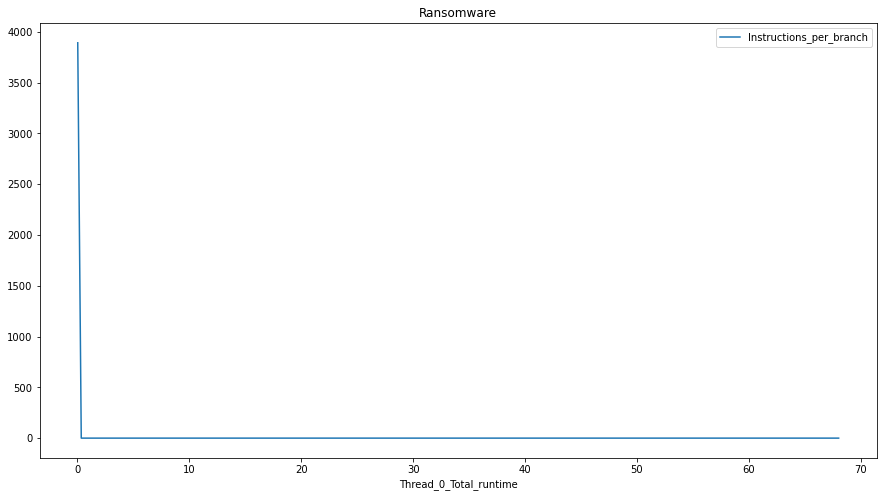

In [70]:
for column_name in BRANCH_COLUMNS:
    branch_data_low_summary.plot(x="Thread_0_Total_runtime", y=column_name, figsize=(15, 8), title="Low Benign")
    branch_data_high_summary.plot(x="Thread_0_Total_runtime", y=column_name, figsize=(15, 8), title="High Benign")
    branch_data_ransomware_summary.plot(x="Thread_0_Total_runtime", y=column_name, figsize=(15, 8), title="Ransomware")
    

## Get all CYCLE rows

In [29]:
cycle_data_low = dataset_preprocessing_low[dataset_preprocessing_low[0] == 3]
cycle_data_low.columns = generate_all_column_names(CYCLE_COLUMNS)
cycle_data_low.head()

,GID,MetricsCount,CpuCount,Thread_0_Total_runtime,Thread_1_Total_runtime,Thread_2_Total_runtime,Thread_3_Total_runtime,Thread_4_Total_runtime,Thread_5_Total_runtime,Thread_6_Total_runtime,...,Thread_6_Cycles_without_execution_L2,Thread_7_Cycles_without_execution_L2,Thread_0_Cycles_without_execution_memory_loads,Thread_1_Cycles_without_execution_memory_loads,Thread_2_Cycles_without_execution_memory_loads,Thread_3_Cycles_without_execution_memory_loads,Thread_4_Cycles_without_execution_memory_loads,Thread_5_Cycles_without_execution_memory_loads,Thread_6_Cycles_without_execution_memory_loads,Thread_7_Cycles_without_execution_memory_loads
2,3,8,8,0.077977,0.011552,0.011552,0.011552,0.011552,0.011552,0.011552,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
13,3,8,8,0.374007,0.007712,0.007712,0.007712,0.007712,0.007712,0.007712,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
24,3,8,8,0.668446,0.008779,0.008779,0.008779,0.008779,0.008779,0.008779,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
35,3,8,8,0.964543,0.008191,0.008191,0.008191,0.008191,0.008191,0.008191,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
46,3,8,8,1.259775,0.009186,0.009186,0.009186,0.009186,0.009186,0.009186,...,0.0,0.174176,0.002781,0.0,0.0,0.0,0.0,0.0,0.0,2.251142


In [31]:
cycle_data_high = dataset_preprocessing_high[dataset_preprocessing_high[0] == 3]
cycle_data_high.columns = generate_all_column_names(CYCLE_COLUMNS)
cycle_data_high.head()

,GID,MetricsCount,CpuCount,Thread_0_Total_runtime,Thread_1_Total_runtime,Thread_2_Total_runtime,Thread_3_Total_runtime,Thread_4_Total_runtime,Thread_5_Total_runtime,Thread_6_Total_runtime,...,Thread_6_Cycles_without_execution_L2,Thread_7_Cycles_without_execution_L2,Thread_0_Cycles_without_execution_memory_loads,Thread_1_Cycles_without_execution_memory_loads,Thread_2_Cycles_without_execution_memory_loads,Thread_3_Cycles_without_execution_memory_loads,Thread_4_Cycles_without_execution_memory_loads,Thread_5_Cycles_without_execution_memory_loads,Thread_6_Cycles_without_execution_memory_loads,Thread_7_Cycles_without_execution_memory_loads
2,3,8,8,0.093710,0.000084,0.000084,0.000084,0.000084,0.000084,0.000084,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,3,8,8,0.450902,0.000066,0.000066,0.000066,0.000066,0.000066,0.000066,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,3,8,8,0.836938,0.000064,0.000064,0.000064,0.000064,0.000064,0.000064,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,3,8,8,1.244756,0.002647,0.002647,0.002647,0.002647,0.002647,0.002647,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46,3,8,8,1.631914,0.000063,0.000063,0.000063,0.000063,0.000063,0.000063,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
cycle_data_ransomware = dataset_preprocessing_ransomware[dataset_preprocessing_ransomware[0] == 3]
cycle_data_ransomware.columns = generate_all_column_names(CYCLE_COLUMNS)
cycle_data_ransomware.head()

,GID,MetricsCount,CpuCount,Thread_0_Total_runtime,Thread_1_Total_runtime,Thread_2_Total_runtime,Thread_3_Total_runtime,Thread_4_Total_runtime,Thread_5_Total_runtime,Thread_6_Total_runtime,...,Thread_6_Cycles_without_execution_L2,Thread_7_Cycles_without_execution_L2,Thread_0_Cycles_without_execution_memory_loads,Thread_1_Cycles_without_execution_memory_loads,Thread_2_Cycles_without_execution_memory_loads,Thread_3_Cycles_without_execution_memory_loads,Thread_4_Cycles_without_execution_memory_loads,Thread_5_Cycles_without_execution_memory_loads,Thread_6_Cycles_without_execution_memory_loads,Thread_7_Cycles_without_execution_memory_loads
2,3,8,8,0.078174,0.000064,0.000064,0.000064,0.000064,0.000064,0.000064,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,3,8,8,0.402574,0.000067,0.000067,0.000067,0.000067,0.000067,0.000067,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,3,8,8,0.774172,0.000064,0.000064,0.000064,0.000064,0.000064,0.000064,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,3,8,8,1.145126,0.000064,0.000064,0.000064,0.000064,0.000064,0.000064,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46,3,8,8,1.506408,0.000063,0.000063,0.000063,0.000063,0.000063,0.000063,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Analyse CYCLE HPC

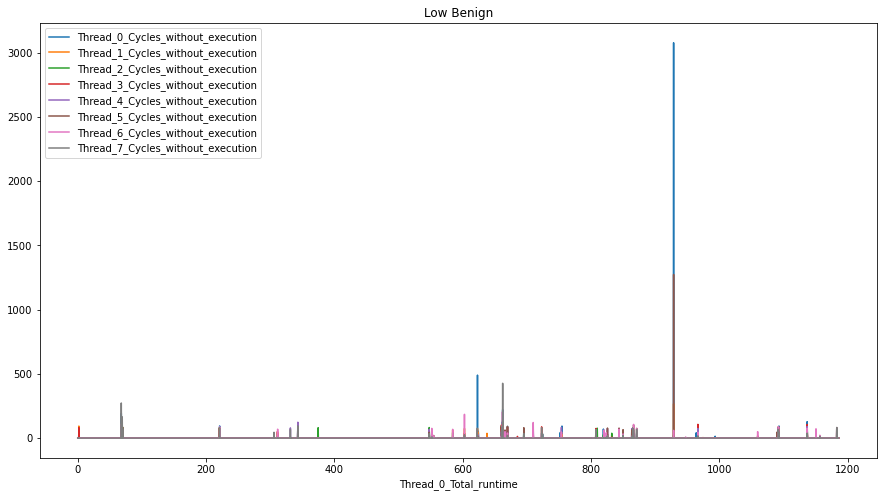

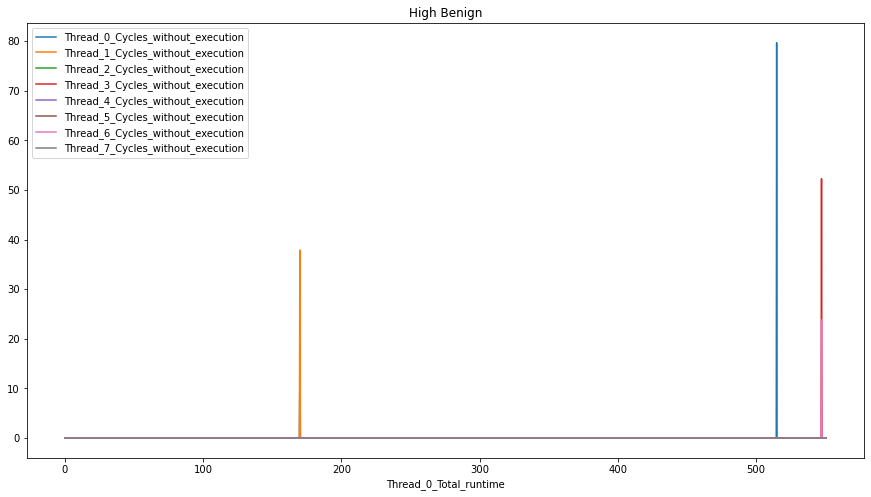

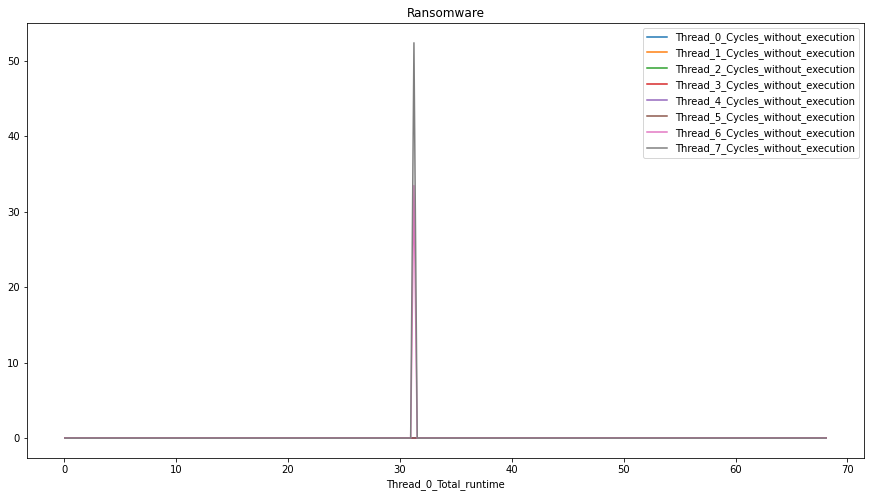

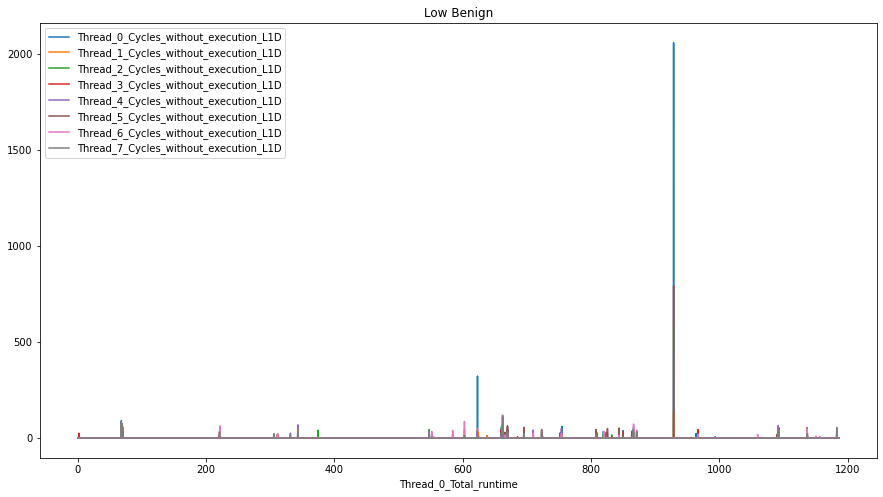

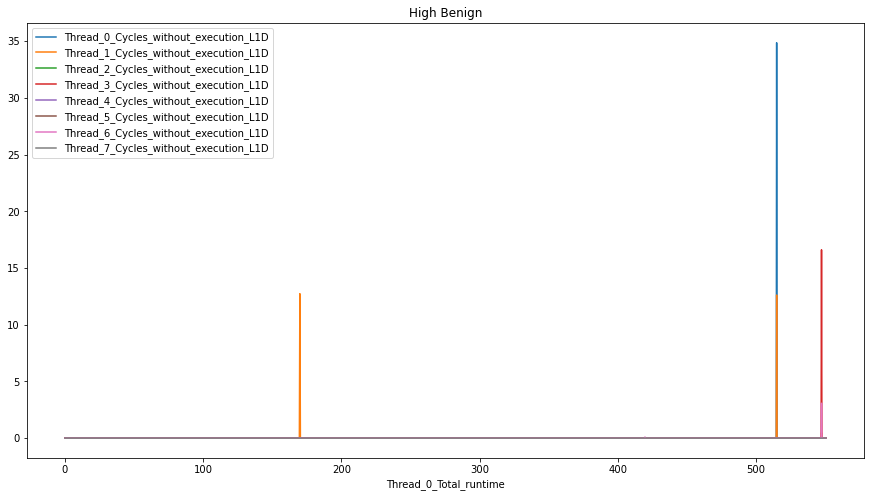

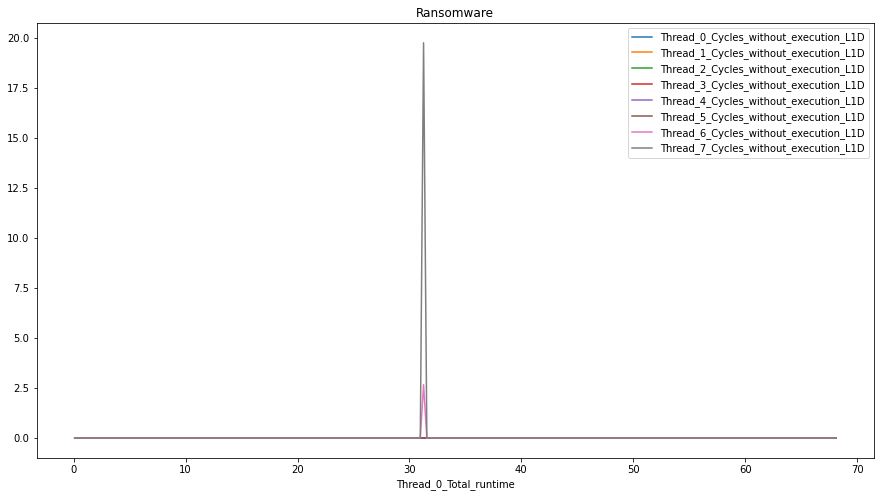

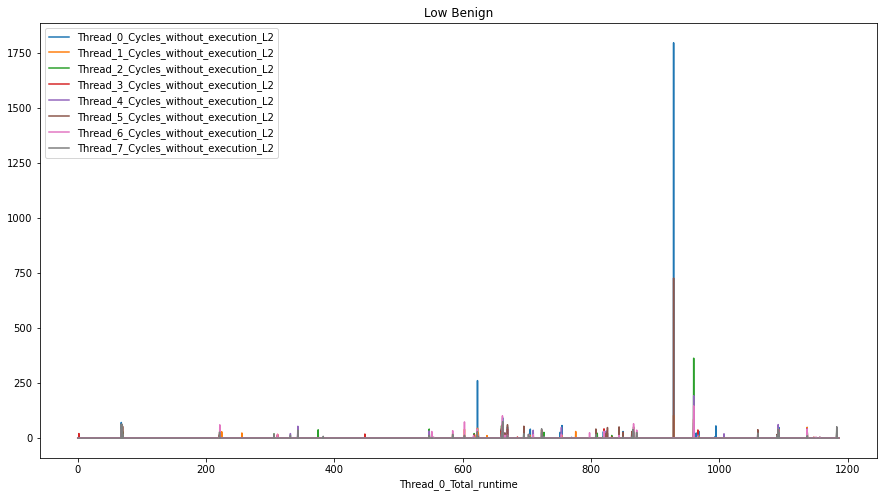

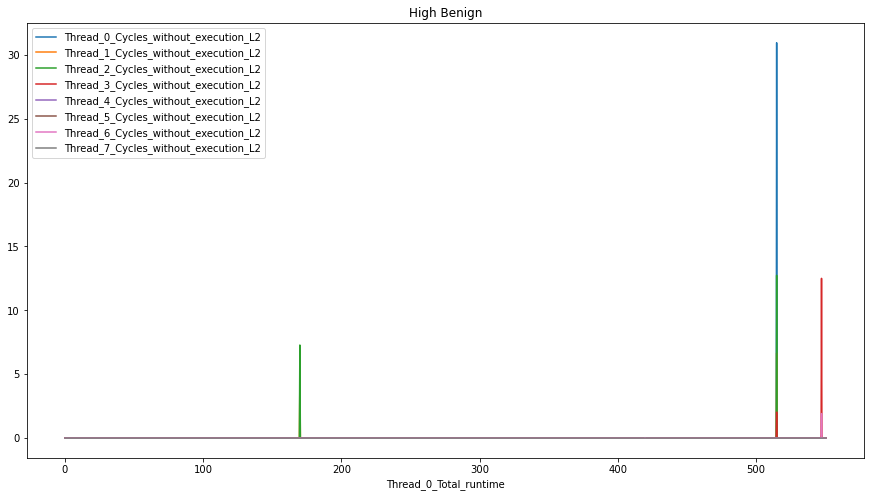

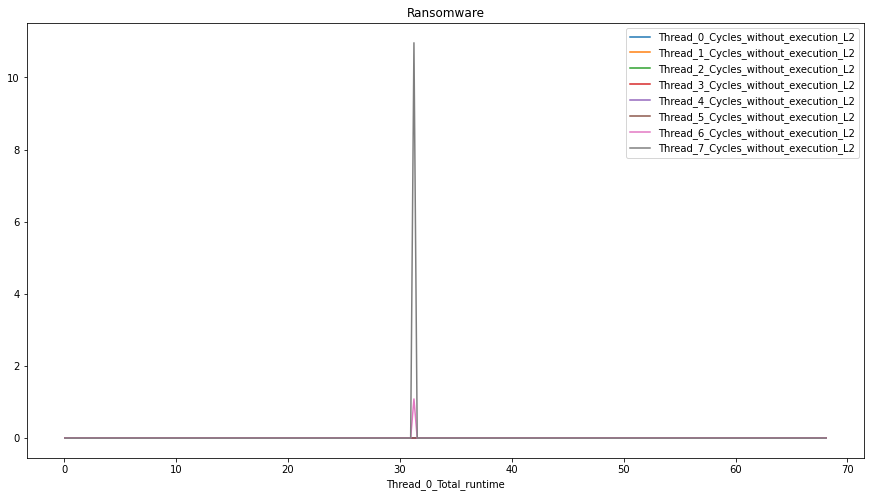

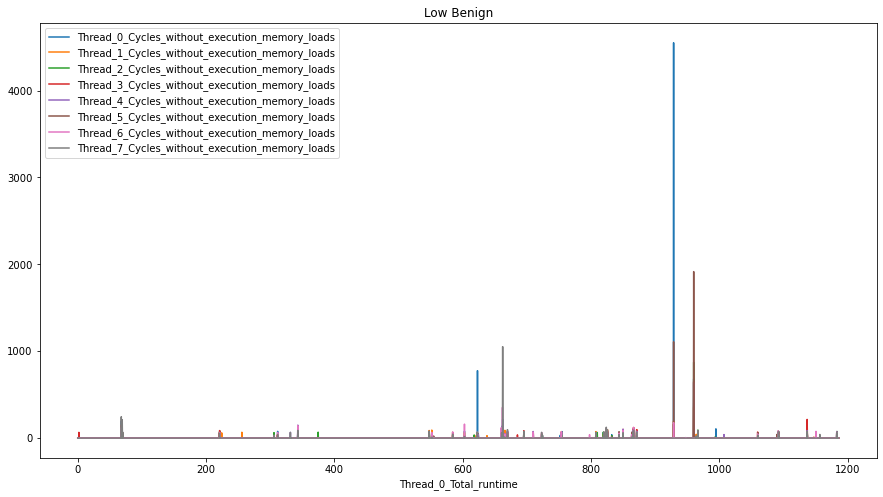

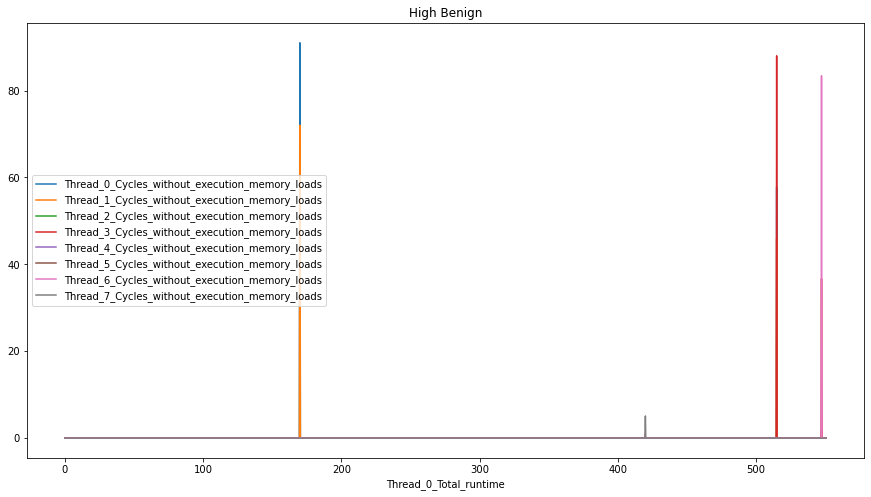

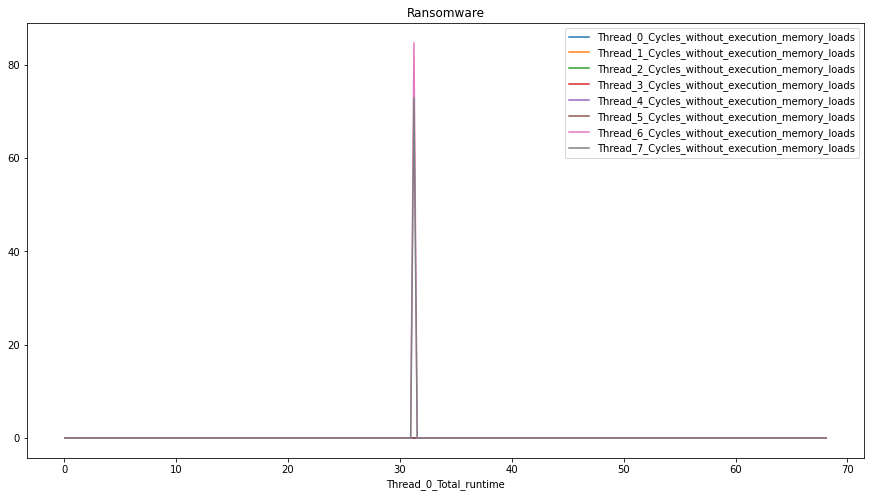

In [34]:
for column_name in CYCLE_COLUMNS:
    cycle_data_low.plot(x="Thread_0_Total_runtime", y=generate_column_names(column_name), figsize=(15, 8), title="Low Benign")
    cycle_data_high.plot(x="Thread_0_Total_runtime", y=generate_column_names(column_name), figsize=(15, 8), title="High Benign")
    cycle_data_ransomware.plot(x="Thread_0_Total_runtime", y=generate_column_names(column_name), figsize=(15, 8), title="Ransomware")
    